<a href="https://colab.research.google.com/github/zmy2338/Machine-Learning-AWS/blob/main/TRAIN_AWS_P1_Lab_9_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab #9: Logistic Regression, One Hot Encoding, and Data Preprocessing** 
---

### **Description**: 
In this lab, you will practice implementing a logistic regression model using standardization and label encoding. You will also learn how to implement one-hot encoding and dummy variable encoding. And you will learn how to evaluate a model's ability to handle unseen data using K-Folds.


### **Lab Structure**
**Part 1**: [Logistic Regression](#p1)

**Part 2**: [One-hot Encoding](#p2)

**Part 3**: [Dummy Variable Encoding](#p2)

**Part 4**: [K-Folds](#p4)


</br>


### **Goals:** 
By the end of this lab, you will be able to:
* Standardize data using sklearn's `StandardScaler(...)`. 
* Encode categorical data using label encoding, one-hot encoding, and dummy variable encoding.
* Evaluate a model's ability to handle unseen data using K-Folds Cross Validation.

</br> 

### **Cheat Sheets**
[Logistic Regression with sklearn](https://docs.google.com/document/d/1rLTuWGgx9E-K1pgWYxUF4B1ExKKxt6MVSkgEKoUbhuE/edit?usp=sharing)

[Standardization, Encoding, and K-Folds with sklearn](https://docs.google.com/document/d/1wu_J33O9PooGahfrnyyN2-Mwza869Ab8GnzDypqjTaw/edit?usp=sharing)


<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
#!pip install pandas
#!pip install scikit-learn

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<a name="p1"></a>

---
## **Part 1: Logistic Regression Independent Practice**
---
We will build a logistic regression model to classify pokemon types based on their attributes.

**Dataset Description:**
This data set includes 898 Pokemon, 1072 including alternate forms, including their number, name, first and second type, the stat total and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed, generation, and legendary status. The attributes of each Pokemon are as follows:

* `Name`: The name of each pokemon

* `Type 1`: Each pokemon has a type, this determines weakness/resistance to attacks

* `Type 2`: Some pokemon are dual type and have 2

* `Total`: Sum of all stats that come after this, a general guide to how strong a pokemon is

* `HP`: Hit points, or health, defines how much damage a pokemon can withstand before fainting

* `Attack`: The base modifier for normal attacks (eg. Scratch, Punch)

* `Defense`: The base damage resistance against normal attacks

* `SP Atk`: Special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

* `SP Def`: Special defense, the base damage resistance against special attacks

* `Speed`: Determines which pokemon attacks first each round

* `Generation`: The generation of games where the pokemon was first introduced

* `Legendary`: Some pokemon are much rarer than others, and are dubbed "legendary"

<br>


**Source:** [data.world](https://data.world/data-society/pokemon-with-stats)


<br>

**Run the cell below to load in the dataset.**

In [ ]:
url ="https://query.data.world/s/p4tnasnlximnov7fpjlu2msnmegyrb"
pokemon_df = pd.read_csv(url,  sep = ",").drop(columns = 'number', axis = 1)
pokemon_df.head()

,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


### **Problem #1: Encode all categorical variables.**
---

Logistic regression can only deal with numerical variables since it creates an equation of them. So, complete the code below to encode `type1`, `type2`, and `legendary` using label encoding as we learned on Day 3.

<br>

**NOTE**: It's important to save the DataFrame with encoded variables in `new_pokemon_df` since we will end up trying a different encoding in Part 2 of the original dataset.

In [ ]:
type1_list = pokemon_df[# COMPLETE THIS LINE].unique().tolist()
type1_map = {type1_list[i] : i for i in range(len(type1_list))}

new_pokemon_df['type1_encoded'] = pokemon_df['# COMPLETE THIS LINE

In [ ]:
type2_list = # COMPLETE THIS LINE
type2_map = {type2_list[i] : i for i in range(len(type2_list))}

new_pokemon_df['type2_encoded'] = new_pokemon_df['# COMPLETE THIS LINE

In [ ]:
# COMPLETE THIS CODE

new_pokemon_df.head()

#### **Solution**

In [ ]:
type1_list = pokemon_df['type1'].unique().tolist()
print(type1_list)
type1_map = {type1_list[i] : i for i in range(len(type1_list))}

pokemon_df['type1_encoded'] = pokemon_df['type1'].map(type1_map)
pokemon_df

['Grass', 'Fire', 'Water', 'Blastoise', 'Bug', 'Normal', 'Dark', 'Poison', 'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying', 'Graass']


,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,type1_encoded
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0
4,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True,10
1068,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True,16
1069,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True,14
1070,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True,14


In [ ]:
type2_list = pokemon_df['type2'].unique().tolist()
type2_map = {type2_list[i] : i for i in range(len(type2_list))}

pokemon_df['type2_encoded'] = pokemon_df['type2'].map(type2_map)

In [ ]:
legendary_list = pokemon_df['legendary'].unique().tolist()
legendary_map = {legendary_list[i] : i for i in range(len(legendary_list))}

pokemon_df['legendary_encoded'] = pokemon_df['legendary'].map(legendary_map)

pokemon_df

,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,type1_encoded,type2_encoded,legendary_encoded
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0,0,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0,0,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0,0,0
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0,0,0
4,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True,10,1,1
1068,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True,16,1,1
1069,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True,14,10,1
1070,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True,14,13,1


### **Problem #2: Decide the independent and dependent variables.**
---

Complete the code below to decide the features and label for this problem. **NOTE**: These should only include numerical variables.

In [ ]:
features = 
label = 

#### **Solution**

In [ ]:
new_pokemon_df = pokemon_df

In [ ]:
features = new_pokemon_df.drop(columns = ['name', 'type1', 'type2', 'legendary', 'type1_encoded'], axis = 1)
label = new_pokemon_df['type1_encoded']
label

0        0
1        0
2        0
3        0
4        0
        ..
1067    10
1068    16
1069    14
1070    14
1071    14
Name: type1_encoded, Length: 1072, dtype: int64

### **Problem #3: Split the data into train and test sets.**
---

For now, we will skip adding a validation set this time. Make sure the test dataset is 20% of the original dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

###### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

### **Problem #4: Scale your data**
---

In [ ]:

scaler = # COMPLETE THIS LINE

X_train_scaled = scaler.# COMPLETE THIS LINE
X_test_scaled = scaler.# COMPLETE THIS LINE

#### **Solution**

In [ ]:
scaler = StandardScaler()

#X_train_scaled_onlyTransform = scaler.transform(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Problem #5: Initialize a Multi-Class Logistic Regression model and train it.**
---

Use one versus rest multi-class classification and the standardized training data.

In [ ]:
clf = # COMPLETE THIS LINE
clf.# COMPLETE THIS LINE

###### **Solution**

In [ ]:
clf = LogisticRegression(multi_class='ovr')
clf.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr')

### **Problem #6: Make predictions for the standardized test data.**
---

**NOTE**: Since this is not a binary classification model, we cannot use the code we used for `y_pred_binary` the day before. Instead, we would need to look at the highest probability class for each datapoint.

In [ ]:
y_pred = # COMPLETE THIS LINE
print(y_pred)

y_pred_proba = # COMPLETE THIS LINE
print(y_pred_proba)

###### **Solution**

In [ ]:
y_pred = clf.predict(X_test_scaled)
print(y_pred)

y_pred_proba = clf.predict_proba(X_test_scaled)
print(y_pred_proba)

[ 0  2  5  2  5  5 12 13  0 14  2 16  4 14  2  5  5  2  5  5  0  2  2 14
  0  0  5  2  2  5  6  4  2 14  0  5 14  2  2  6  5  5  0  2  2  0 13  4
  5  2  2  5 15  2  0  2  8  2 13  2  4  5  5  0  2 15  5  2  2 14 11  8
  0 14  0  8  5  1  2  2  5  5  5 14  5  5  2  2  0  1 13 14  2  9  9  5
 14 15  0  4  2  5  8  0  5 14  2  2  5  5  2  0  5 17 15  2 13  2  5  2
  0  2  0 14  2 12  0  4  2  2 15  5  2  2  4  2 17  5  2 13  5  8  5 14
  9  2  4 14  5 13 14  2 14  5 14  2  0  5  5  5  2  0  5 12  2 13  2  2
  2  2  2  0  5  2  5  2  5  5  1  2  5  2  2  2  5  2  1 14 14  5 13 14
 13  5  4  5  0  2  2  2  9  5  2  2 14  4 14 12  5  2  5  5  5 14  2]
[[1.70699378e-01 1.13903300e-01 9.23148906e-02 ... 3.47337671e-02
  1.73496070e-02 1.44325578e-03]
 [1.31230695e-01 7.40020924e-02 1.42835823e-01 ... 2.97255549e-02
  7.21220223e-03 8.92827916e-04]
 [2.72644498e-02 9.36837720e-03 4.09235794e-02 ... 1.80290519e-02
  5.31647254e-02 1.04989119e-04]
 ...
 [1.29405822e-01 4.66119983e-02 1.57808329e

### **Problem #7: Print the accuracy score.**
---

Keep in mind that there are 20 unique labels, meaning randomly guessing would achieve an accuracy score of $\frac{1}{20} = 0.05$.

In [ ]:
accuracy = # WRITE YOUR CODE HERE
print(f'Accuracy: {accuracy}')

###### **Solution**

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.2


### **Problem #8: Plot the confusion matrix.**
---

Use 'display_labels = type1_list' for `ConfusionMatrixDisplay` to see more meaningful labels.

In [ ]:
cm = # WRITE YOUR CODE HERE
disp = # WRITE YOUR CODE HERE
disp.plot()
plt.xticks(rotation = 90)
plt.show()

###### **Solution**

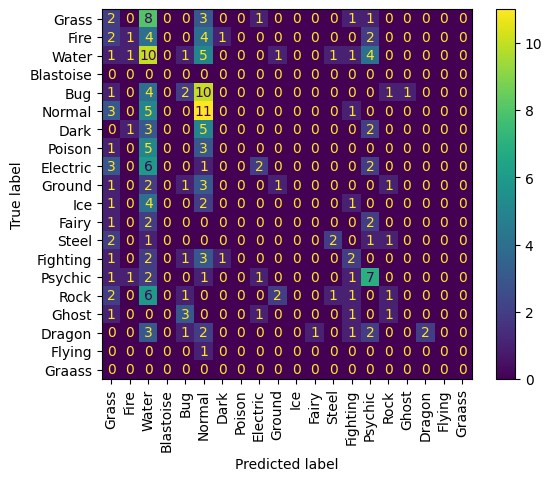

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=type1_list)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

### **Problem #9: Use your model**

Given the following values, classify these new Pokemon.
1.  `total = 300`,	`hp = 50`, `attack = 40`,	`defense = 60`,	`sp_attack = 60`,	`sp_defense = 67`,	`speed = 40`,	`generation = 6`, `type2_encoded = 3`, `legendary_encoded = 1`

2.  `total = 250`,	`hp = 40`, `attack = 60`,	`defense = 40`,	`sp_attack = 40`,	`sp_defense = 30`,	`speed = 70`,	`generation = 8`, `type2_encoded = 14`, `legendary_encoded = 0`

3. `total = 500`,	`hp = 70`, `attack = 50`,	`defense = 75`,	`sp_attack = 80`,	`sp_defense = 80`,	`speed = 100`,	`generation = 6`, `type2_encoded = 8`, `legendary_encoded = 1`

<br>

####**Remember to standardize the data with the scaler you used in Step #6 and `.transform(...)`.**


In [ ]:
new_pokemon = pd.DataFrame([[# COMPLETE THIS LINE , columns = features.columns)

new_scaled = scaler.transform(# COMPLETE THIS LINE 
predictions = # COMPLETE THIS LINE 

print(predictions)
print([type1_list[predictions[i]] for i in range(3)])

#### **Solution**

In [ ]:
new_pokemon = pd.DataFrame([[300,50,40,60,60,67,40,6,3,1],[250,40,60,40,40,30,70,8,14,0], [500,70,50,75,80,80,100,6,8,1]] , columns = features.columns)

new_scaled = scaler.transform(new_pokemon)
predictions = clf.predict(new_scaled)

print(predictions)
print([type1_list[predictions[i]] for i in range(3)])

[14  6 14]
['Psychic', 'Dark', 'Psychic']


---
## **Back To Lecture**
---

<a name="p2"></a>

---
## **Part 2: One-hot Encoding**
---

In this section, you will perform the same modeling process, **except using one-hot encoding instead of label encoding**.

### **Problem #1: Encode all categorical features.**
---

Complete the code below to encode `type2` and `legendary`. However, **one-hot encode** these variables instead. We will leave the label as is to make predictions easier.

<br>

**NOTE**: There are a few extra lines we need to add to allow `OneHotEncoder` and `pandas` to work, so we have provided the full `type2` encoding for you.

In [ ]:
# Create the new dataframe
new_pokemon_df = pokemon_df.drop(columns = ['type2', 'legendary'], axis = 1)

# Create the encoder and transform the desired columns
type2_ohe = OneHotEncoder(sparse_output = False)
type2_ohe.set_output(transform = 'pandas')

transformed = type2_ohe.fit_transform(pokemon_df[['type2']])

# Create the new dataframe
new_pokemon_df[transformed.columns] = transformed


new_pokemon_df.head()

In [ ]:
# Create the encoder and transform the desired columns
legendary_ohe = # COMPLETE THIS LINE
legendary_ohe.set_output(# COMPLETE THIS LINE

transformed = legendary_ohe.# COMPLETE THIS LINE

# Create the new dataframe
new_pokemon_df[# COMPLETE THIS LINE


new_pokemon_df.head()

#### **Solution**

In [ ]:
# Create the new dataframe
new_pokemon_df = pokemon_df.drop(columns = ['type2', 'legendary'], axis = 1)

# Create the encoder and transform the desired columns
type2_ohe = OneHotEncoder(sparse_output = False)
type2_ohe.set_output(transform = 'pandas')

transformed = type2_ohe.fit_transform(pokemon_df[['type2']])

# Create the new dataframe
new_pokemon_df[transformed.columns] = transformed


new_pokemon_df.head()

,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,type2_Grass,type2_Ground,type2_Ice,type2_Normal,type2_Poison,type2_Psychic,type2_Rock,type2_Steel,type2_Water,type2_nan
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Venusaur,Grass,525,80,82,83,100,100,80,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Mega Venusaur,Grass,625,80,100,123,122,120,80,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Gigantamax Venusaur,Grass,525,80,82,83,100,100,80,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create the encoder and transform the desired columns
legendary_ohe = OneHotEncoder(sparse_output = False)
legendary_ohe.set_output(transform = 'pandas')

transformed = legendary_ohe.fit_transform(pokemon_df[['legendary']])

# Create the new dataframe
new_pokemon_df[transformed.columns] = transformed


new_pokemon_df.head()

,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,type2_Ice,type2_Normal,type2_Poison,type2_Psychic,type2_Rock,type2_Steel,type2_Water,type2_nan,legendary_False,legendary_True
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Venusaur,Grass,525,80,82,83,100,100,80,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Mega Venusaur,Grass,625,80,100,123,122,120,80,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Gigantamax Venusaur,Grass,525,80,82,83,100,100,80,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### **Problem #2: Prepare the data for modeling.**
---

Specifically,
* Decide the independent and dependent variables (only including numerical variables except `type1`, which is the label).
* Split the data into train and test sets such that 20% is left for testing.
* Scale your data.


In [ ]:
# Decide the independent and dependent variables
features = # COMPLETE THIS LINE
label = # COMPLETE THIS LINE

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

# Scale your data
scaler = # COMPLETE THIS LINE

X_train_scaled = scaler.# COMPLETE THIS LINE
X_test_scaled = scaler.# COMPLETE THIS LINE

#### **Solution**

In [ ]:
# Decide the independent and dependent variables
features = new_pokemon_df.drop(columns = ['name', 'type1'], axis = 1)
label = new_pokemon_df['type1']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Scale your data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Problem #3: Initialize and train your model.**
---

In [ ]:
clf = # COMPLETE THIS LINE
clf. # COMPLETE THIS LINE

#### **Solution**

In [ ]:
clf = LogisticRegression(multi_class='ovr')
clf.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr')

### **Problem #4: Make predictions for the standardized test data.**
---

In [ ]:
y_pred = # COMPLETE THIS LINE
print(y_pred)

y_pred_proba = # COMPLETE THIS LINE
print(y_pred_proba)

###### **Solution**

In [ ]:
y_pred = clf.predict(X_test_scaled)
print(y_pred)

y_pred_proba = clf.predict_proba(X_test_scaled)
print(y_pred_proba)

['Grass' 'Dark' 'Psychic' 'Ice' 'Bug' 'Normal' 'Steel' 'Rock' 'Ice' 'Dark'
 'Grass' 'Bug' 'Bug' 'Dragon' 'Psychic' 'Grass' 'Normal' 'Steel'
 'Fighting' 'Normal' 'Bug' 'Rock' 'Dark' 'Water' 'Grass' 'Psychic' 'Water'
 'Ghost' 'Psychic' 'Normal' 'Fire' 'Ice' 'Poison' 'Psychic' 'Ghost'
 'Fighting' 'Water' 'Bug' 'Ground' 'Rock' 'Dark' 'Psychic' 'Electric'
 'Rock' 'Ice' 'Ice' 'Dark' 'Rock' 'Normal' 'Water' 'Water' 'Bug' 'Steel'
 'Electric' 'Normal' 'Electric' 'Psychic' 'Normal' 'Fighting' 'Normal'
 'Water' 'Water' 'Water' 'Bug' 'Water' 'Steel' 'Normal' 'Bug' 'Water'
 'Water' 'Psychic' 'Grass' 'Water' 'Dragon' 'Water' 'Psychic' 'Normal'
 'Water' 'Normal' 'Bug' 'Normal' 'Normal' 'Bug' 'Psychic' 'Normal'
 'Normal' 'Steel' 'Psychic' 'Steel' 'Psychic' 'Fighting' 'Grass' 'Water'
 'Rock' 'Fighting' 'Normal' 'Psychic' 'Electric' 'Fighting' 'Water'
 'Water' 'Electric' 'Electric' 'Poison' 'Electric' 'Psychic' 'Water'
 'Dragon' 'Normal' 'Normal' 'Normal' 'Fighting' 'Normal' 'Rock' 'Ghost'
 'Ice' 'Dark'

### **Problem #5: Evaluate your model.**
---

Specifically,
* Print the accuracy score.
* Plot the confusion matrix.

<br>

**NOTE**: Since we are using `type1` as the label directly here, we just use `display_labels=clf.classes_`. This is one good reason for using non-encoded labels.

In [ ]:
# Print the accuracy score
accuracy = # COMPLETE THIS LINE
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(# COMPLETE THIS LINE

disp = ConfusionMatrixDisplay(# COMPLETE THIS LINE
disp.plot()

plt.xticks(rotation = 90)
plt.show()

#### **Solution**

Accuracy: 0.4372093023255814


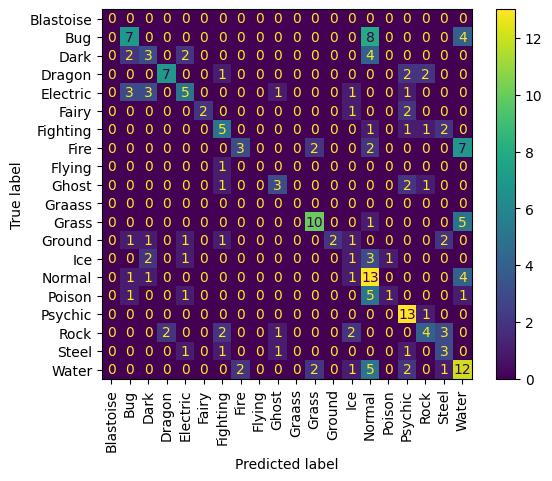

In [ ]:
# Print the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

### **Problem #6: Use your model.**
---

Specifically, make predictions for the same data points as in Part 1, Problem #9:

1.  `total = 300`,	`hp = 50`, `attack = 40`,	`defense = 60`,	`sp_attack = 60`,	`sp_defense = 67`,	`speed = 40`,	`generation = 6`, `type2 = 'Dragon'`, `legendary = True`

2.  `total = 250`,	`hp = 40`, `attack = 60`,	`defense = 40`,	`sp_attack = 40`,	`sp_defense = 30`,	`speed = 70`,	`generation = 8`, `type2 = 'Dark'`, `legendary = False`

3. `total = 500`,	`hp = 70`, `attack = 50`,	`defense = 75`,	`sp_attack = 80`,	`sp_defense = 80`,	`speed = 100`,	`generation = 6`, `type2 = 'Ground'`, `legendary = True`

<br>

This is a little more complicated with one-hot encoding, so we will break it down into the following parts:
1. Create an unencoded DataFrame with these points.
2. Transform the `type2` and `legendary` columns.
3. Create an encoded DataFrame with the transformed columns and those that did not need to be transformed.
4. Make our predictions as usual.

#### **1. Create an unencoded DataFrame with these points.**

In [ ]:
column_labels = ['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation', 'type2', 'legendary']

tmp_df = pd.DataFrame([[# COMPLETE THIS LINE

##### **Solution**

In [ ]:
column_labels = ['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation', 'type2', 'legendary']

tmp_df = pd.DataFrame([[300,50,40,60,60,67,40,6,'Dragon', True],[250,40,60,40,40,30,70,8,'Dark', False], [500,70,50,75,80,80,100,6,'Ground', True]] , columns = column_labels)

#### **2. Transform the `type2` and `legendary` columns.**

In [ ]:
type2_transformed = type2_ohe.transform(tmp_df[[# COMPLETE THIS LINE
legendary_transformed = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
type2_transformed = type2_ohe.transform(tmp_df[['type2']])
legendary_transformed = legendary_ohe.transform(tmp_df[['legendary']])

#### **3. Create an encoded DataFrame with the transformed columns and those that did not need to be transformed.**

In [ ]:
new_points_df = tmp_df.drop(columns = ['type2', # COMPLETE THIS LINE
new_points_df[type2_transformed.columns] = # COMPLETE THIS LINE
new_points_df[# COMPLETE THIS LINE

##### **Solution**

In [ ]:
new_points_df = tmp_df.drop(columns = ['type2', 'legendary'], axis = 1)
new_points_df[type2_transformed.columns] = type2_transformed
new_points_df[legendary_transformed.columns] = legendary_transformed

#### **4. Make our predictions as usual.**

In [ ]:
new_scaled = # COMPLETE THIS LINE
predictions = # COMPLETE THIS LINE

print([type2_map[x] for x in predictions])
print(predictions)

##### **Solution**

In [ ]:
new_scaled = scaler.transform(new_points_df)
predictions = clf.predict(new_scaled)

print([type2_map[x] for x in predictions])
print(predictions)

ValueError: ignored

---
## **Back To Lecture**
---

<a name="p3"></a>

---
## **Part 3: Dummy Variable Encoding**
---

In this section, you will perform the same modeling process, **except using dummy variable encoding instead of label or one-hot encoding**.

### **Problem #1: Encode all categorical features.**
---

Complete the code below to encode `type2` and `legendary`. However, **dummy variable encode** these variables instead. We will leave the label as is to make predictions easier.

In [ ]:
# Create the new dataframe

new_pokemn_df = pd.get_dummies(pokemon_df, columns = ['type2', 'legendary'])

new_pokemon_df = pokemon_df.drop(columns = ['type2', 'legendary'], axis = 1)

# Create the encoder and transform the desired columns
type2_ohe = OneHotEncoder(sparse_output = False)
type2_ohe.set_output(transform = 'pandas')

transformed = type2_ohe.fit_transform(pokemon_df[['type2']])

# Create the new dataframe
new_pokemon_df[transformed.columns] = transformed


new_pokemon_df.head()

,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,type2_Grass,type2_Ground,type2_Ice,type2_Normal,type2_Poison,type2_Psychic,type2_Rock,type2_Steel,type2_Water,type2_nan
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Venusaur,Grass,525,80,82,83,100,100,80,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Mega Venusaur,Grass,625,80,100,123,122,120,80,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Gigantamax Venusaur,Grass,525,80,82,83,100,100,80,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create the encoder and transform the desired columns
legendary_ohe = # COMPLETE THIS LINE
legendary_ohe.set_output(# COMPLETE THIS LINE

transformed = legendary_ohe.# COMPLETE THIS LINE

# Create the new dataframe
new_pokemon_df[# COMPLETE THIS LINE


new_pokemon_df.head()

#### **Solution**

In [ ]:
# Create the new dataframe
new_pokemon_df = pokemon_df.drop(columns = ['type2', 'legendary'], axis = 1)

# Create the encoder and transform the desired columns
type2_ohe = OneHotEncoder(drop = 'first', sparse_output = False)
type2_ohe.set_output(transform = 'pandas')

transformed = type2_ohe.fit_transform(pokemon_df[['type2']])

# Create the new dataframe
new_pokemon_df[transformed.columns] = transformed


new_pokemon_df.head()

,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,type2_Grass,type2_Ground,type2_Ice,type2_Normal,type2_Poison,type2_Psychic,type2_Rock,type2_Steel,type2_Water,type2_nan
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Venusaur,Grass,525,80,82,83,100,100,80,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Mega Venusaur,Grass,625,80,100,123,122,120,80,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Gigantamax Venusaur,Grass,525,80,82,83,100,100,80,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create the encoder and transform the desired columns
legendary_ohe = OneHotEncoder(drop = 'first', sparse_output = False)
legendary_ohe.set_output(transform = 'pandas')

transformed = legendary_ohe.fit_transform(pokemon_df[['legendary']])

# Create the new dataframe
new_pokemon_df[transformed.columns] = transformed


new_pokemon_df

,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,...,type2_Ground,type2_Ice,type2_Normal,type2_Poison,type2_Psychic,type2_Rock,type2_Steel,type2_Water,type2_nan,legendary_True
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Venusaur,Grass,525,80,82,83,100,100,80,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mega Venusaur,Grass,625,80,100,123,122,120,80,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gigantamax Venusaur,Grass,525,80,82,83,100,100,80,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,Glastrier,Ice,580,100,145,130,65,110,30,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1068,Spectrier,Ghost,580,100,65,60,145,80,130,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1069,Calyrex,Psychic,500,100,80,80,80,80,80,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1070,Ice Rider Calyrex,Psychic,680,100,165,150,85,130,50,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### **Problem #2: Prepare the data for modeling.**
---

Specifically,
* Decide the independent and dependent variables (only including numerical variables except `type1`, which is the label).
* Split the data into train and test sets such that 20% is left for testing.
* Scale your data.


In [ ]:
# Decide the independent and dependent variables
features = # COMPLETE THIS LINE
label = # COMPLETE THIS LINE

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

# Scale your data
scaler = # COMPLETE THIS LINE

X_train_scaled = scaler.# COMPLETE THIS LINE
X_test_scaled = scaler.# COMPLETE THIS LINE

#### **Solution**

In [ ]:
# Decide the independent and dependent variables
features = new_pokemon_df.drop(columns = ['name', 'type1'], axis = 1)
label = new_pokemon_df['type1']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Scale your data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Problem #3: Initialize and train your model.**
---

In [ ]:
clf = # COMPLETE THIS LINE
clf. # COMPLETE THIS LINE

#### **Solution**

In [ ]:
clf = LogisticRegression(multi_class='ovr')
clf.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr')

### **Problem #4: Make predictions for the standardized test data.**
---

In [ ]:
y_pred = # COMPLETE THIS LINE
print(y_pred)

y_pred_proba = # COMPLETE THIS LINE
print(y_pred_proba)

###### **Solution**

In [ ]:
y_pred = clf.predict(X_test_scaled)
print(y_pred)

y_pred_proba = clf.predict_proba(X_test_scaled)
print(y_pred_proba)

['Grass' 'Dark' 'Psychic' 'Rock' 'Bug' 'Normal' 'Steel' 'Rock' 'Ice'
 'Dark' 'Grass' 'Bug' 'Bug' 'Dragon' 'Psychic' 'Grass' 'Normal' 'Steel'
 'Fighting' 'Normal' 'Bug' 'Rock' 'Dark' 'Water' 'Grass' 'Psychic' 'Water'
 'Ghost' 'Psychic' 'Normal' 'Fire' 'Ice' 'Poison' 'Psychic' 'Ghost'
 'Fighting' 'Water' 'Bug' 'Ground' 'Rock' 'Dark' 'Psychic' 'Electric'
 'Rock' 'Ice' 'Ice' 'Dark' 'Rock' 'Normal' 'Water' 'Water' 'Normal'
 'Steel' 'Electric' 'Normal' 'Electric' 'Psychic' 'Normal' 'Fighting'
 'Normal' 'Water' 'Water' 'Water' 'Bug' 'Water' 'Steel' 'Normal' 'Bug'
 'Water' 'Water' 'Psychic' 'Grass' 'Water' 'Dragon' 'Water' 'Psychic'
 'Normal' 'Water' 'Normal' 'Bug' 'Normal' 'Normal' 'Bug' 'Psychic'
 'Normal' 'Normal' 'Steel' 'Psychic' 'Steel' 'Psychic' 'Fighting' 'Grass'
 'Water' 'Rock' 'Fighting' 'Normal' 'Psychic' 'Electric' 'Fighting'
 'Water' 'Water' 'Electric' 'Electric' 'Poison' 'Electric' 'Psychic'
 'Water' 'Dragon' 'Normal' 'Normal' 'Normal' 'Fighting' 'Normal' 'Rock'
 'Ghost' 'Ice' 'D

### **Problem #5: Evaluate your model.**
---

Specifically,
* Print the accuracy score.
* Plot the confusion matrix.

<br>

**NOTE**: Since we are using `type1` as the label directly here, we just use `display_labels=clf.classes_`. This is one good reason for using non-encoded labels.

In [ ]:
# Print the accuracy score
accuracy = # COMPLETE THIS LINE
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(# COMPLETE THIS LINE

disp = ConfusionMatrixDisplay(# COMPLETE THIS LINE
disp.plot()

plt.xticks(rotation = 90)
plt.show()

#### **Solution**

Accuracy: 0.4418604651162791


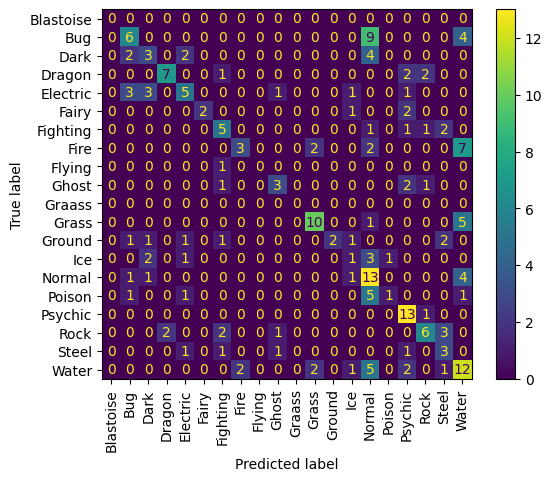

In [ ]:
# Print the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

### **Problem #6: Use your model.**
---

Specifically, make predictions for the same data points as in Part 1, Problem #9:

1.  `total = 300`,	`hp = 50`, `attack = 40`,	`defense = 60`,	`sp_attack = 60`,	`sp_defense = 67`,	`speed = 40`,	`generation = 6`, `type2 = 'Dragon'`, `legendary = True`

2.  `total = 250`,	`hp = 40`, `attack = 60`,	`defense = 40`,	`sp_attack = 40`,	`sp_defense = 30`,	`speed = 70`,	`generation = 8`, `type2 = 'Dark'`, `legendary = False`

3. `total = 500`,	`hp = 70`, `attack = 50`,	`defense = 75`,	`sp_attack = 80`,	`sp_defense = 80`,	`speed = 100`,	`generation = 6`, `type2 = 'Ground'`, `legendary = True`

<br>

This is a little more complicated with one-hot encoding, so we will break it down into the following parts:
1. Create an unencoded DataFrame with these points.
2. Transform the `type2` and `legendary` columns.
3. Create an encoded DataFrame with the transformed columns and those that did not need to be transformed.
4. Make our predictions as usual.

#### **1. Create an unencoded DataFrame with these points.**

In [ ]:
column_labels = ['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation', 'type2', 'legendary']

tmp_df = pd.DataFrame([[# COMPLETE THIS LINE

##### **Solution**

In [ ]:
column_labels = ['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation', 'type2', 'legendary']

tmp_df = pd.DataFrame([[300,50,40,60,60,67,40,6,'Dragon', True],[250,40,60,40,40,30,70,8,'Dark', False], [500,70,50,75,80,80,100,6,'Ground', True]] , columns = column_labels)

#### **2. Transform the `type2` and `legendary` columns.**

In [ ]:
type2_transformed = type2_ohe.transform(tmp_df[[# COMPLETE THIS LINE
legendary_transformed = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
type2_transformed = type2_ohe.transform(tmp_df[['type2']])
legendary_transformed = legendary_ohe.transform(tmp_df[['legendary']])

#### **3. Create an encoded DataFrame with the transformed columns and those that did not need to be transformed.**

In [ ]:
new_points_df = tmp_df.drop(columns = ['type2', # COMPLETE THIS LINE
new_points_df[type2_transformed.columns] = # COMPLETE THIS LINE
new_points_df[# COMPLETE THIS LINE

##### **Solution**

In [ ]:
new_points_df = tmp_df.drop(columns = ['type2', 'legendary'], axis = 1)
new_points_df[type2_transformed.columns] = type2_transformed
new_points_df[legendary_transformed.columns] = legendary_transformed

#### **4. Make our predictions as usual.**

In [ ]:
new_scaled = # COMPLETE THIS LINE
predictions = # COMPLETE THIS LINE

print([type2_map[x] for x in predictions])
print(predictions)

##### **Solution**

In [ ]:
new_scaled = scaler.transform(new_points_df)
predictions = clf.predict(new_scaled)

print([type2_map[x] for x in predictions])
print(predictions)

[6, 0, 4]
['Psychic' 'Poison' 'Water']


---
## **Back To Lecture**
---

<a name="p4"></a>

---
## **Part 4: K-Folds**
---

### **Problem #1: Train a 5NN Model on the Iris dataset.**

To start, let's train a KNN model with K = 5 on the Iris dataset as we normally would walking through Steps #1 - 7 of implementing of an ML model:
1. Load in the data
2. Decide which features will be the predictors (the X values), and which feature you want to predict (the y values)
3. Split the data into training and testing datasets
4. Import a ML algorithm
5. Set the model’s parameters
6. Fit the model on the training set and test the model on the test dataset.
7. Evaluate the model’s performance
8. Apply your model

#### **Steps #1 - 2**

**Run the code below to load the data and separate into dependent and independent variables.**

In [ ]:
# Step #1
iris = load_iris()

# Step #2
X=iris.data
y=iris.target

#### **Step #3**

Make sure to set aside 20% of the data for testing.

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

#### **Steps #4 - 5**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

#### **Steps #6 - 7**

In [ ]:
# Step #6
knn.# COMPLETE THIS LINE
pred = # COMPLETE THIS LINE

# Step #7
accuracy = # COMPLETE THIS LINE
print(accuracy)

##### **Solution**

In [ ]:
# Step #6
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Step #7
accuracy = accuracy_score(y_test, pred)
print(accuracy)

1.0


### **Problem #2: Train a 5NN Model on the Iris dataset using 5-Folds Cross Validation.**

Now, model the data in the same way, **except using K-Folds during training**.

#### **Steps #1 - 2**

**Run the code below to load the data and separate into dependent and independent variables.**

In [ ]:
# Step #1
iris = load_iris()

# Step #2
X=iris.data
y=iris.target

#### **Step #3**

Make sure to set aside 20% of the data for testing.

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

#### **Steps #4 - 5**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

#### **Steps #6 - 7**

**Run the code below to perform 5-Fold Cross Validation and then train the final model.**

In [ ]:
kf = KFold(n_splits=5)

# store each score in the list "evaluations"
evaluations = []
index = 1

# loop through folds and store the accuracy score
for train_index, test_index in kf.split(X_train):
    X_tr, X_te = X_train[train_index], X_train[test_index]
    y_tr, y_te = y_train[train_index], y_train[test_index]

    # fit model and make a prediction
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_te)

    # get accuracy score
    score = accuracy_score(y_te, pred)
    print(f'Fold #{index} has an accuracy score of {score}.')

    evaluations.append(score)
    index += 1


# Finish training
knn.fit(X_train, y_train)
print(f'\n{len(evaluations)}-Folds CV demonstrated an average accuracy score of {sum(evaluations)/len(evaluations)}.')

pred = knn.predict(X_test)
print(f'Evaluating on the test set demonstrated an accuracy score of {accuracy_score(y_test, pred)}.')

Fold #1 has an accuracy score of 0.9583333333333334.
Fold #2 has an accuracy score of 0.9583333333333334.
Fold #3 has an accuracy score of 0.875.
Fold #4 has an accuracy score of 0.9583333333333334.
Fold #5 has an accuracy score of 0.9583333333333334.

5-Folds CV demonstrated an average accuracy score of 0.9416666666666668.
Evaluating on the test set demonstrated an accuracy score of 1.0.


### **Problem #3: Train an 11NN Model on the Iris dataset using 5-Folds Cross Validation.**

#### **Steps #1 - 2**

**Run the code below to load the data and separate into dependent and independent variables.**

In [ ]:
# Step #1
iris = load_iris()

# Step #2
X=iris.data
y=iris.target

#### **Step #3**

Make sure to set aside 20% of the data for testing.

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

#### **Steps #4 - 5**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

#### **Steps #6 - 7**

**Run the code below to perform 5-Fold Cross Validation and then train the final model.**

In [ ]:
kf = KFold(n_splits=5)

# store each score in the list "evaluations"
evaluations = []
index = 1

# loop through folds and store the accuracy score
for train_index, test_index in kf.split(X_train):
    X_tr, X_te = X_train[train_index], X_train[test_index]
    y_tr, y_te = y_train[train_index], y_train[test_index]

    # fit model and make a prediction
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_te)

    # get accuracy score
    score = accuracy_score(y_te, pred)
    print(f'Fold #{index} has an accuracy score of {score}.')

    evaluations.append(score)
    index += 1


# Finish training
knn.fit(X_train, y_train)
print(f'\n{len(evaluations)}-Folds CV demonstrated an average accuracy score of {sum(evaluations)/len(evaluations)}.')

pred = knn.predict(X_test)
print(f'Evaluating on the test set demonstrated an accuracy score of {accuracy_score(y_test, pred)}.')

Fold #1 has an accuracy score of 1.0.
Fold #2 has an accuracy score of 0.9583333333333334.
Fold #3 has an accuracy score of 0.875.
Fold #4 has an accuracy score of 0.9583333333333334.
Fold #5 has an accuracy score of 0.9583333333333334.

5-Folds CV demonstrated an average accuracy score of 0.95.
Evaluating on the test set demonstrated an accuracy score of 1.0.


### **Problem #4: Train a Linear Regression Model on the Diabetes dataset using 5-Folds Cross Validation.**

This dataset contains data from diabetic patients with features such as their BMI, age, blood pressure, and glucose levels that are useful in predicting the diabetes disease progression in patients. We will be looking at these variables that will be used to help predict disease progression in diabetic patients. 

<br>

**NOTE:** Use $R^2$ when evaluating each fold.

#### **Steps #1 - 2**

**Run the code below to load the data and separate into dependent and independent variables.**

In [ ]:
# Step #1
diabetes = datasets.load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['TARGET'] = diabetes.target

# Step #2
X = diabetes_df[['age', 'bmi', 'bp']].values
y = diabetes_df['TARGET'].values

#### **Step #3**

Make sure to set aside 20% of the data for testing.

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

#### **Steps #4 - 5**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#### **Steps #6 - 7**

In [ ]:
kf = KFold(# COMPLETE THIS LINE

# store each score in the list "evaluations"
evaluations = []
index = 1

# loop through folds and store the accuracy score
for train_index, test_index in kf.split(# COMPLETE THIS LINE
    X_tr, X_te = X_train[train_index], X_train[test_index]
    y_tr, y_te = y_train[train_index], y_train[test_index]

    # fit model and make a prediction
    reg.fit(# COMPLETE THIS LINE
    pred = reg.predict(# COMPLETE THIS LINE

    # get r2 score
    score = # COMPLETE THIS LINE
    print(f'Fold #{index} has an R^2 of {score}.')

    evaluations.append(score)
    index += 1

# Finish training
reg.fit(# COMPLETE THIS LINE
print(f'\n{len(evaluations)}-Folds CV demonstrated an average R^2 of {sum(evaluations)/len(evaluations)}.')

pred = reg.predict(# COMPLETE THIS LINE
print(f'Evaluating on the test set demonstrated an R^2 of {r2_score(y_test, pred)}.')

##### **Solution**

In [ ]:
kf = KFold(n_splits=5)

# store each score in the list "evaluations"
evaluations = []
index = 1

# loop through folds and store the accuracy score
for train_index, test_index in kf.split(X_train):
    X_tr, X_te = X_train[train_index], X_train[test_index]
    y_tr, y_te = y_train[train_index], y_train[test_index]

    # fit model and make a prediction
    reg.fit(X_tr, y_tr)
    pred = reg.predict(X_te)

    # get r2 score
    score = r2_score(y_te, pred)
    print(f'Fold #{index} has a R^2 of {score}.')

    evaluations.append(score)
    index += 1

# Finish training
reg.fit(X_train, y_train)
print(f'\n{len(evaluations)}-Folds CV demonstrated an average R^2 of {sum(evaluations)/len(evaluations)}.')

pred = reg.predict(X_test)
print(f'Evaluating on the test set demonstrated a R^2 of {r2_score(y_test, pred)}.')

Fold #1 has a R^2 of 0.3825812066210206.
Fold #2 has a R^2 of 0.24338223384036806.
Fold #3 has a R^2 of 0.40318209956478845.
Fold #4 has a R^2 of 0.5201073475793501.
Fold #5 has a R^2 of 0.29751534532945545.

5-Folds CV demonstrated an average R^2 of 0.36935364658699654.
Evaluating on the test set demonstrated a R^2 of 0.2909156196410876.


### **[OPTIONAL] Problem #5: Train a 5NN Model on the Breast Cancer dataset using 5-Folds Cross Validation.**


The following dataset is taken from the [UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)). The dataset contains mammography exam results and whether or not cancer was detected.

<br>

**NOTE:** Use the accuracy score when evaluating each fold.

#### **Steps #1 - 2**

**Run the code below to load the data and separate into dependent and independent variables.**

In [ ]:
# Step #1
cancer_dataset = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
cancer_df['TARGET'] = cancer_dataset.target

# Step #2
X = cancer_df[["mean radius","mean texture"]].values
y = cancer_df[["TARGET"]].values

#### **Step #3**

Make sure to set aside 20% of the data for testing.

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

#### **Steps #4 - 5**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

#### **Steps #6 - 7**

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
kf = KFold(n_splits=5)

# store each score in the list "evaluations"
evaluations = []
index = 1

# loop through folds and store the accuracy score
for train_index, test_index in kf.split(X_train):
    X_tr, X_te = X_train[train_index], X_train[test_index]
    y_tr, y_te = y_train[train_index], y_train[test_index]

    # fit model and make a prediction
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_te)

    # get accuracy score
    score = accuracy_score(y_te, pred)
    print(f'Fold #{index} has an accuracy score of {score}.')

    evaluations.append(score)
    index += 1


# Finish training
knn.fit(X_train, y_train)
print(f'\n{len(evaluations)}-Folds CV demonstrated an average accuracy score of {sum(evaluations)/len(evaluations)}.')

pred = knn.predict(X_test)
print(f'Evaluating on the test set demonstrated an accuracy score of {accuracy_score(y_test, pred)}.')

Fold #1 has an accuracy score of 0.8351648351648352.
Fold #2 has an accuracy score of 0.8901098901098901.
Fold #3 has an accuracy score of 0.9340659340659341.
Fold #4 has an accuracy score of 0.8791208791208791.
Fold #5 has an accuracy score of 0.8571428571428571.

5-Folds CV demonstrated an average accuracy score of 0.8791208791208792.
Evaluating on the test set demonstrated an accuracy score of 0.9035087719298246.


# End of lab
---
© 2023 The Coding School, All rights reserved